In [1]:
!pip install catboost

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Importing Data and Performing EDA**

In [3]:
df = pd.read_csv('dynamic_pricing.csv')

In [4]:
df.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422


In [5]:
df.isnull().sum()

Number_of_Riders           0
Number_of_Drivers          0
Location_Category          0
Customer_Loyalty_Status    0
Number_of_Past_Rides       0
Average_Ratings            0
Time_of_Booking            0
Vehicle_Type               0
Expected_Ride_Duration     0
Historical_Cost_of_Ride    0
dtype: int64

In [6]:
df.dtypes

Number_of_Riders             int64
Number_of_Drivers            int64
Location_Category           object
Customer_Loyalty_Status     object
Number_of_Past_Rides         int64
Average_Ratings            float64
Time_of_Booking             object
Vehicle_Type                object
Expected_Ride_Duration       int64
Historical_Cost_of_Ride    float64
dtype: object

In [7]:
for i in range(len(df)):
    df.iloc[i,9] = round(df.iloc[i,9],2)

In [8]:
df.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.26
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.87
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.80
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.20
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.68


In [9]:
df.describe()

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,60.372000,27.076000,50.031000,4.257220,99.58800,372.502690
std,23.701506,19.068346,29.313774,0.435781,49.16545,187.158809
min,20.000000,5.000000,0.000000,3.500000,10.00000,25.990000
25%,40.000000,11.000000,25.000000,3.870000,59.75000,221.362500
50%,60.000000,22.000000,51.000000,4.270000,102.00000,362.020000
75%,81.000000,38.000000,75.000000,4.632500,143.00000,510.495000
max,100.000000,89.000000,100.000000,5.000000,180.00000,836.120000


<Axes: xlabel='Expected_Ride_Duration', ylabel='Historical_Cost_of_Ride'>

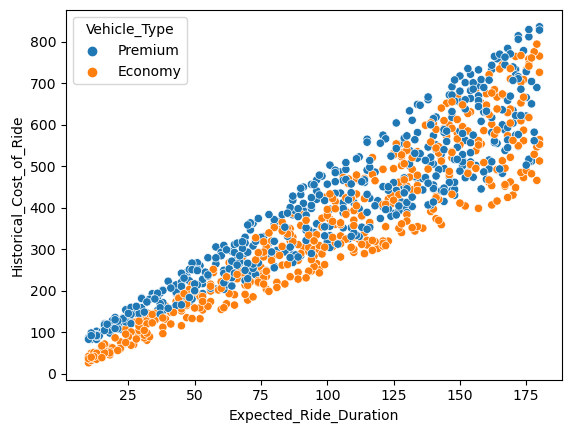

In [10]:
sns.scatterplot(df, x='Expected_Ride_Duration',y='Historical_Cost_of_Ride',hue='Vehicle_Type')

In [11]:
df1 = df.groupby(['Customer_Loyalty_Status'])['Historical_Cost_of_Ride'].var()

In [12]:
df1

Customer_Loyalty_Status
Gold       34212.860010
Regular    35952.596180
Silver     34952.634675
Name: Historical_Cost_of_Ride, dtype: float64

<Axes: xlabel='Customer_Loyalty_Status', ylabel='Historical_Cost_of_Ride'>

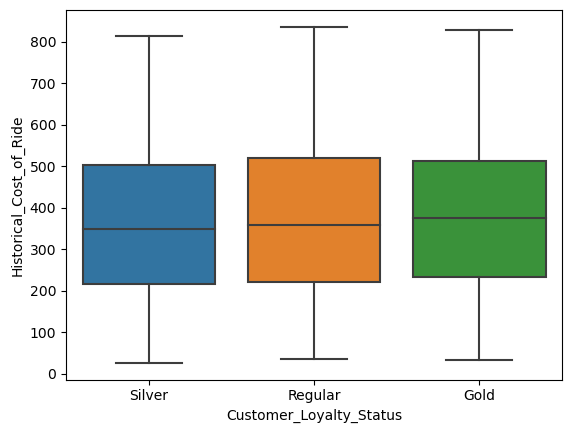

In [13]:
sns.boxplot(df,x='Customer_Loyalty_Status',y='Historical_Cost_of_Ride')

In [11]:
high_demand_percentile = 75
low_demand_percentile = 25

df['demand_multiplier'] = np.where(df['Number_of_Riders'] > np.percentile(df['Number_of_Riders'], 75),
                                     df['Number_of_Riders'] / np.percentile(df['Number_of_Riders'], 75),
                                     df['Number_of_Riders'] / np.percentile(df['Number_of_Riders'], 25))

In [12]:
df.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride,demand_multiplier
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.26,1.111111
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.87,1.450000
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.80,1.050000
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.20,1.098765
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.68,1.950000


In [13]:
df['supply_multiplier'] = np.where(df['Number_of_Drivers'] > np.percentile(df['Number_of_Drivers'], 25),
                                     np.percentile(df['Number_of_Drivers'], 75) /df['Number_of_Drivers'],
                                     np.percentile(df['Number_of_Drivers'],25) /df['Number_of_Drivers'])

In [14]:
demand_threshold_high = 1.2
demand_threshold_low = 0.8
supply_threshold_high = 0.8  
supply_threshold_low = 1.2

In [15]:
df['adjusted_ride_cost'] = df['Historical_Cost_of_Ride'] * (np.maximum(df['demand_multiplier'], demand_threshold_low)*np.maximum(df['supply_multiplier'], supply_threshold_high))

In [17]:
df.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride,demand_multiplier,supply_multiplier,adjusted_ride_cost
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.26,1.111111,0.844444,266.713086
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.87,1.450000,0.974359,245.647103
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.80,1.050000,1.225806,424.484516
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.20,1.098765,1.357143,701.153616
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.68,1.950000,1.727273,1952.467636


In [18]:
df['profit_percentage'] = ((df['adjusted_ride_cost']-df['Historical_Cost_of_Ride'])/df['Historical_Cost_of_Ride'])*100

profitable = df[df['profit_percentage']>0]
loss = df[df['profit_percentage']<0]

profitable_cnt = len(profitable)
loss_cnt = len(loss)

In [19]:
profitable_cnt

826

In [20]:
loss_cnt

173

([<matplotlib.patches.Wedge at 0x7252c8e1f6d0>,
 [Text(-0.5693562637878331, -0.9411872528278098, 'Profitable Rides'),
  Text(0.5693563078479881, 0.9411872261743183, 'Rides in Loss')],
 [Text(-0.3105579620660907, -0.5133748651788053, '82.68%'),
  Text(0.31055798609890256, 0.5133748506405371, '17.32%')])

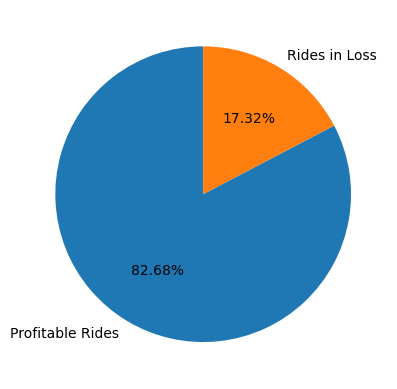

In [21]:
plt.pie(x=[profitable_cnt,loss_cnt],startangle=90,labels=['Profitable Rides','Rides in Loss'],autopct='%.2f%%')

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
def data_pipeline(data):
    num_features = data.select_dtypes(include=['float','int']).columns
    cat_features = data.select_dtypes(include=['object']).columns

    df[num_features] = df[num_features].fillna(df[num_features].mean())

    for feature in num_features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3-Q1
        lower_bound = Q1-(1.5*IQR)
        upper_bound = Q3+(1.5*IQR)
        data[feature] = np.where((data[feature]<lower_bound) | (data[feature]>upper_bound),
                                 data[feature].mean(), data[feature])

    data[categorical_features] = data[categorical_features].fillna(data[categorical_features].mode().iloc[0])

    return data

**Model Development**

In [24]:
from sklearn.model_selection import train_test_split
x = df[["Number_of_Riders", "Number_of_Drivers", "Vehicle_Type", "Expected_Ride_Duration"]]
y = df[["adjusted_ride_cost"]]

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1,random_state=42)

In [26]:
from catboost import CatBoostRegressor

In [27]:
model1 = CatBoostRegressor(cat_features=[2], verbose=100, depth=6, 
                           iterations=500, l2_leaf_reg=1, learning_rate=0.05)
model1.fit(x_train, y_train)

0:	learn: 464.9028331	total: 53.3ms	remaining: 26.6s
100:	learn: 132.1597270	total: 142ms	remaining: 561ms
200:	learn: 104.3216777	total: 234ms	remaining: 348ms
300:	learn: 90.6631316	total: 315ms	remaining: 208ms
400:	learn: 79.8720058	total: 385ms	remaining: 95ms
499:	learn: 72.5358612	total: 463ms	remaining: 0us


In [28]:
y_pred1 = model1.predict(x_test)

In [29]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [30]:
print("MAE:", mean_absolute_error(y_test, y_pred1))
print("RMSE:", mean_squared_error(y_test, y_pred1))
print("R² Score:", r2_score(y_test, y_pred1))

MAE: 111.55729827754651
RMSE: 24149.185139218
R² Score: 0.9008536088948023


In [31]:
user_number_of_riders = 75
user_number_of_drivers = 28
user_vehicle_type = "Premium"
Expected_Ride_Duration = 71
predicted_price = model1.predict(np.array([user_number_of_riders, user_number_of_drivers, user_vehicle_type, Expected_Ride_Duration]))
print("Predicted price:", predicted_price)

Predicted price: 718.7642299279404


In [32]:
df.sample(n=1)

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride,demand_multiplier,supply_multiplier,adjusted_ride_cost,profit_percentage
545,36,8,Urban,Gold,47,4.07,Afternoon,Economy,77,305.01,0.9,1.375,377.449875,23.75


**Hyperparameter Tuning**

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
param_grid = {
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'iterations': [200, 500, 800],
    'l2_leaf_reg': [1, 3, 5]
}

In [35]:
model2 = CatBoostRegressor(cat_features=[2],verbose=0)

In [ ]:
grid_search = GridSearchCV(
    estimator=model2,
    param_grid=param_grid,
    cv=3,
    scoring='r2',
    n_jobs=-1
)

grid_search.fit(x_train, y_train)

In [ ]:
print("Best parameters:", grid_search.best_params_)
print("Best R2 score:", grid_search.best_score_)